# <div align="center">Practical #3</div>

# Aim: Solve the s-wave radial Schrödinger equation for a particle of mass m in an anharmonic oscillator potential.

The one dimensional, dimensionless Schrodinger equation is:

$$
\left[-\frac{\hbar^2}{2 m}\frac{d^2}{dx^2} + V\left(x\right)\right]\Psi\left(x\right) = E \Psi\left(x\right)
$$

where, $m$ is the mass of the particle, $E$ is the energy of the particle, $\Psi(x)$ is the wavefunction of the particle, and $V(x)$ is the anhamonic oscillator potential, given by

$$
V(x) = \frac{1}{2} k x^2 + \frac{1}{3} b x^3
$$

where, $k$ is the some **spring constant** and $b$ is some **nonlinearity parameter**; it is zero for the one dimensional linear harmonic oscillator.

Putting, $V(x) = \frac{1}{2} k x^2 +  \frac{1}{3} b x^3$ and then multiplying both LHS and RHS of the one dimensional Schrodinger equation for the harmonic oscillator, by $\frac{-2m}{\hbar^2}$, we get:

$$
\frac{d^2 \Psi\left(x\right)}{dx^2} + \left[\epsilon - W\left(x\right)\right]\Psi\left(x\right) = 0
$$

where, 

$$
\begin{align}
\epsilon  = \frac{E}{E_0} (fm^{-2}) \text{ with, $E_0 = \frac{\hbar^2}{2m} =\frac{(\hbar c)^2}{2(m c^2)}$} (MeV fm^2), \text{ and } W(x) = \frac{2m}{\hbar^2} V\left(x\right) = \frac{2m c^2}{(\hbar c)^2}\left(\frac{1}{2}k x^2 + \frac{1}{3} b x^3\right) = \frac{1}{E_0}\left(\frac{1}{2}k x^2 + \frac{1}{3} b x^3\right)(fm^{-2})
\end{align}
$$

The parameters are given as:

$$
\hbar c = 197.3\; (MeV\; fm),\; m c^2 =  940\; (MeV),\; k = 100\; (MeV\; fm^{-2}), \; b \in [ 0,\; 10,\; 30]\; (MeV \; fm^{-3}) 
$$

This gives $E_0 = 20.706\; MeV fm^2$

## Note:
The above equation is not dimensionless, it has a dimenion of $[L^{-2}]$ on both sides, as evident from the units of the above parameters



## Boundary conditions:

The boundary condition for the wavefunctions of a harmonic oscillator is:

$$
\Psi(\pm \infty) = 0
$$

## Update equation:

The **update equation** for the above Schrodinger equation according to **Numerov's method** is given by (refer to the notes):

1. **Forward integration**: By forward integration I mean, integration from $-\infty$ to $\infty$

$$
\Psi_{i+1} =  \frac{\Psi_i\left(12 -10f_i\right) -  \Psi_{i-1}f_{i-1}}{f_{i+1}}
$$

Or,

$$
\Psi_{i+2} =  \frac{\Psi_{i+1}\left(12 -10f_{i+1}\right) -  \Psi_{i}f_{i}}{f_{i+2}} \quad\left(\text{Putting, $i = i+1$}\right)
$$

where,

$$
f_i = 1 + \frac{h^2}{12}g_i, \quad g_i = \epsilon - \frac{1}{E_0}\left(\frac{1}{2}k x_i^2 + \frac{1}{3} b x_i^3\right)
$$

**Note**: Here, $h$ is the **step size** along x-axis and not the **Plank's constant**.

**Notice !**, we need $\Psi_{i+1}$ and $\Psi_{i}$ in order to evaluate, $\Psi_{i+2}$. Therefore, for the first iteration, i.e., $i = 0$, we will need to supply, $\Psi_{1}$ and $\Psi_{0}$ to evaluate, $\Psi_{2}$. The value of  $\Psi_{0}$ is nothing but the value of $\Psi(-\infty)$ which is zero according to the boundary condition. The value of $\Psi_{1}$ can be choosen arbitarily, we choose some small value say, $\Psi_1 = d\Psi = 0.01$.

2. **backward integration**: Backward integration simply mean integrating from $\infty$ to $-\infty$. For this we rewrite the update equation as:

$$
\begin{align}
&\Psi_{i-1} =  \frac{\Psi_i\left(12 -10f_i\right) -  \Psi_{i+1}f_{i+1}}{f_{i-1}}\\
%
\implies &\Psi_{i} =  \frac{\Psi_{i+1}\left(12 -10f_{i+1}\right) -  \Psi_{i+2}f_{i+2}}{f_{i}}\quad\left(\text{Putting, $i = i+1$}\right)\\
\end{align}
$$

## Note:
**For Harmonic oscillator problem, the backward and forward integration both gives correct result.**


## Normalization condition:

Let the normalization factor be $N$ such that, $N\Psi(r)$ is normalized, i.e.,
$$
\begin{align}
&\int_{-\infty}^\infty N^2|\Psi(x)|^2 dx = 1\\
\implies & N = \sqrt{\frac{1}{\int_{-\infty}^\infty|\Psi(x)|^2 dx}}
\end{align}
$$

## Shooting algorithm

**Shooting algorithm:** The algorithm to find the energy eigen values is sometimes known as the shooting algorithm.

To find the Energy **Eigen values** we will utilize the boundary conditions:
$$
\begin{equation}
\Psi(\pm\infty) = 0
\end{equation}
$$

This boundary condition can be implemented by choosing, some large, $x = x_c$ (say) such that, $\Psi(\pm x_c) = 0$. 

Lets say, $E_1$ corresponds to a correct energy level, then when we **backward/forward integrate** the one dimensional schrodinger equation derived earlier using **Numerov’s method**, we should get $\Psi(\pm\infty) = 0$. A deviation of the energy from $E_1$ will result in $\Psi(\pm \infty) \ne 0$. The basic procedure to search for correct Energy Eigen value aka **shooting algorithm** is as follows:

Start wite a guess energy, 
1) The guess energy, $E_1$ should be smaller than the actual energy. For example, if we are searching for the energy eigen value of the ground state which is $\epsilon = 1$. Then our guess energy should be smaller than 1.<br>
2) With the guess energy forward integrate the equation and get the value of the wavefunction at $x = \infty$, which we will denote as $\Psi_1$. Meanwhile, Set another energy, $E_2 = E_1$.<br>
3) Increase the energy $E_2$ by an amount $\delta E$ and get a new energy, $E_2 = E_2 + \delta E$. <br>
4) Integrate the Scrodinger equation to get the corresponding wavefunction, $\Psi_2$ and evaluate $\Psi_2(\infty)$. <br>
5) Go back to step 2 untill we get $\Psi_1(\infty)\times \Psi_2(\infty) <0$. <br>
6) At this step, we should have the correct energy enclosed in the interval, $[E_1, E_2]$. Use root finding method, e.g. **scipy.optimize.brentq** to get the correct energy.

# <div align="center">Code</div>

# Common libraries

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Uncommon libraries used

## 1) *scipy.integrate.simps()*: 

**Syntax** : scipy.integrate.simps(y, x)<br>
**Return** : Returns the integrated value of y(x) using **Simpsion's** rule method.<br>

Example: 

x = **numpy**.arange(0, 10)<br>
y = **numpy**.sqrt(x)<br>
integration = **scipy.integrate.simps**(y, x)

## 2) *scipy.optimize.brentq*
Uses the classic **Brent’s method** to find a root of the function $f(x)$ on the sign changing interval $x\in[a , b]$. Check [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.brentq.html) for the syntax. For details on Brent's method check [this](https://nickcdryan.com/2017/09/13/root-finding-algorithms-in-python-line-search-bisection-secant-newton-raphson-boydens-inverse-quadratic-interpolation-brents/). Recall that we had algorithms such as *Line Search*, *Bisection*, *Secant*, *Newton-Raphson*, *Inverse Quadratic Interpolation*; *Brent’s Method* is just one of such methods for finding the root of a function in the sign changing interval $x\in[a,b]$. By "**root** of a function", $f(x)$ I mean the value of $x$ where $f(x) = 0$.

In [17]:
from scipy.integrate import simps
from scipy.optimize import brentq

# <div align="center">Function definitions</div>

We define three functions:

## 1) eigen_function_at_infinity(E, x): 

it takes dimensionless energy, E and a vector x and returns the value of the eigen function corresponding to dimensionless energy, epsilon at x = infinity

## 2) eigen_function(E, x):

it takes dimensionless energy, E and a vector x and returns a vector containing the value of the  corresponding wavefunction at all x.

## 3) eigen_values(E_guess, n):

It takes a guess dimensionless eigen energy, E_guess and returns a vector containing the first $n$ eigen values.

In [18]:
###############################################################
#                  eigen_function_at_infinity()
###############################################################

def eigen_function_at_infinity(E, x):
    
    # parameters
    global h, b, E_0, k
    
    y = np.zeros(x.size)
    y[0] = 0.0                 # wavefunction at -infinity = 0
    dy   = 0.01
    y[1] = dy

    h12 = h**2 / 12
    g  = (E - (0.5*k*x**2 + 0.3*b*x**3))/E_0
    f  = 1.0 + h12 * g

    for i in range(0, g.size - 2, 1):
        y[i+2] = (12 - 10*f[i+1])* y[i+1] - y[i] * f[i]
        y[i+2] /= f[i+2]

    # normalization
    y /= np.sqrt(simps(np.abs(y)**2, x))     # a/=3 means a = a/3 


    y_infinity = y[x.size - 1]

    
    return y_infinity


###############################################################
#                  eigen_function()
###############################################################

def eigen_function(E, x):
    
    # parameters
    global h,b, E_0, k
    
    y = np.zeros(x.size)
    y[0] = 0.0            # wavefunction at -infinity  = 0
    dy   = 0.01
    y[1] = dy

    h12 = h**2 / 12
    g  = (E - (0.5*k*x**2 + 0.3*b*x**3))/E_0
    f  = 1.0 + h12 * g

    for i in range(0, g.size - 2, 1):
        y[i+2] = (12 - 10*f[i+1])* y[i+1] - y[i] * f[i]
        y[i+2] /= f[i+2]

    # normalization
    y /= np.sqrt(simps(np.abs(y)**2, x))

    return y


###############################################################
#                  eigen_function()
###############################################################

def eigen_values(E_guess, x, n):

    E = np.zeros(n)
    
    E_2 = E_1 = E_guess
    
    # step size for energy
    dE      = 0.1 

    for i in range(n):
        # wavefunction at x = infinity corresponding to the guess energy
        y1      = eigen_function_at_infinity(E_1,x)
        
        while True:
            E_2 += dE
            y2 = eigen_function_at_infinity(E_2, x)
            
            if y1 * y2 < 0:
                break
        E[i] = brentq(eigen_function_at_infinity, E_1, E_2, args=(x))
        E_1 = E_2 = E[i] + dE
    
    return E

# <div align="center">Main code starts from here</div>

# Print the value of ground state energy and evaluate the ground state wavefunction for different values of $b$

In [19]:
# Global variables
x   = np.linspace(-5, 5, 1000)
y   = np.zeros((x.size, 3))

# Global parameters
h   = x[1] - x[0]         # step size
k   = 100
E_0 = 20.706
b_s = [0,10,30]           # values of b's
E_b = np.zeros(3)         # Energy corresponding to different values of b

E_guess = 0               # Guess energy for ground state

for i in range(3):
    b = b_s[i]
    E_b[i] = eigen_values(E_guess, x, 1)
    y[:,i] = eigen_function(E_b[i], x) 
    print ('Energy for b = %d is E_%d = %5.3f (MeV)' % (b,b, E_b[i]))

Energy for b = 0 is E_0 = 32.176 (MeV)
Energy for b = 10 is E_10 = 32.125 (MeV)
Energy for b = 30 is E_30 = 31.686 (MeV)


# Plot the ground state wavefunction along with the anharmonic potential for different values of $b$

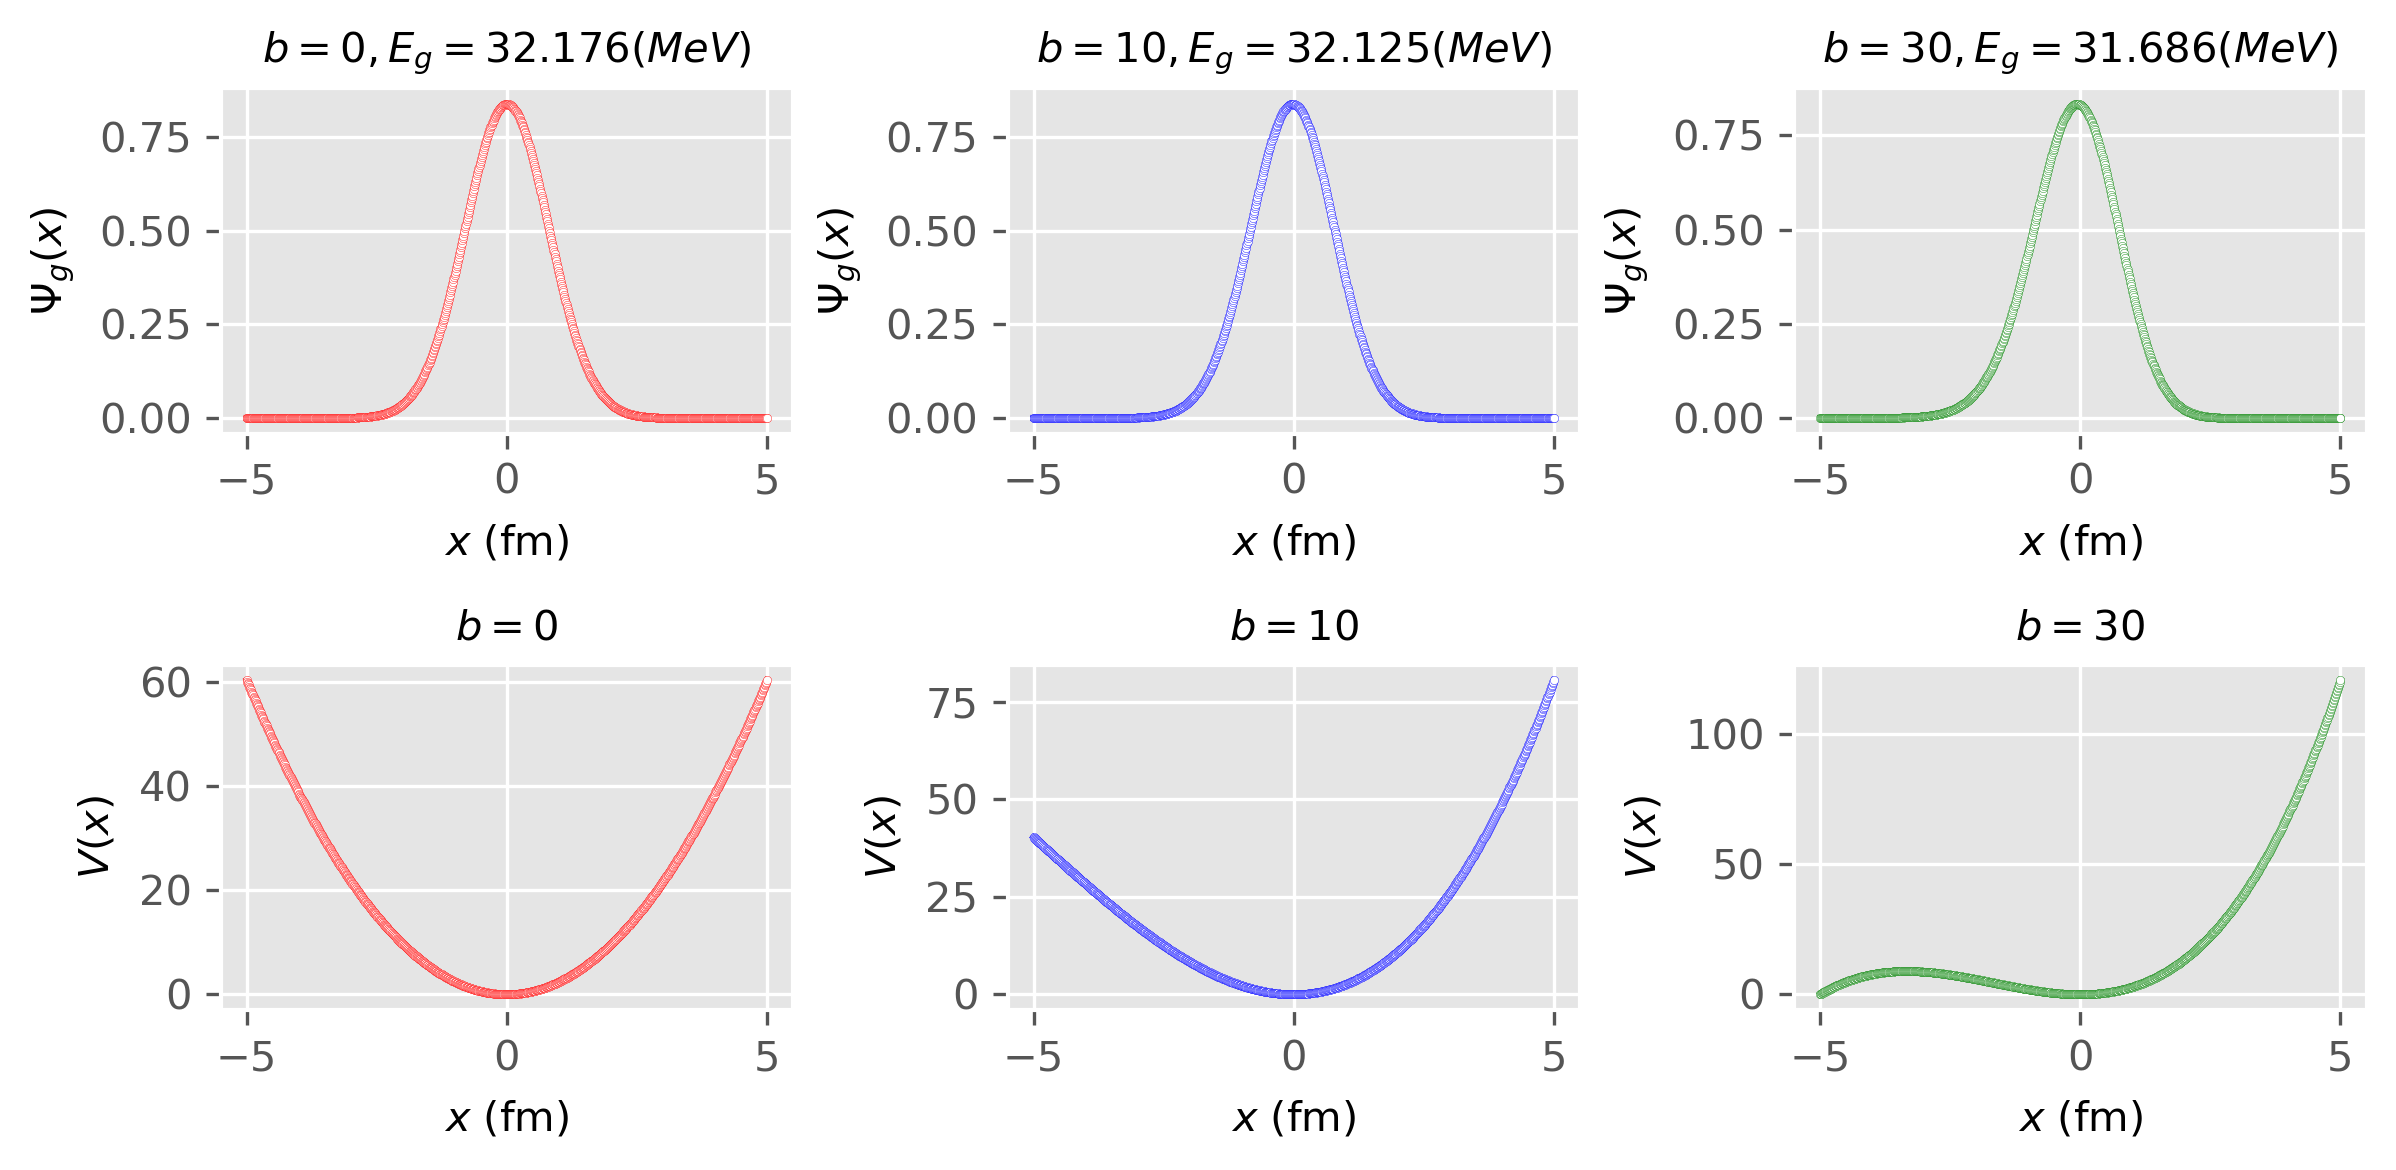

In [21]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(8, 4),dpi=300)

axes = [plt.subplot(2, 3 ,i+1) for i in range(2*len(b_s))]    

# plt.subplot(2, 2, 1) means the figure has 2 row, 2 columns, and this plot is the first plot.

color=['red', 'blue', 'green']

#               Plots in the 1st row (Ground state wavefunctions)
###########################################################################
for i in range(len(b_s)):
    ax = axes[i]

    ax.plot(x, y[:,i], marker='o', ms = 2, mfc='white',mew=0.1, color=color[i])
    
    # ms stands for marker size
    # mfc stands for marker fill colour
    # mew stands for marker edge width
    
    # axis labels
    ax.set_xlabel(r'$x$ (fm)', labelpad=5, fontsize="10")
    ax.set_ylabel(r'$\Psi_g(x)$', labelpad=5, fontsize="10")

    # plot titles
    ax.set_title(r'$b = %d, E_g = %5.3f (MeV)$' % (b_s[i], E_b[i]), fontsize="10")
##########################################################################


#               Plots in the 2nd row (Potentials)
##########################################################################
for i in range(len(b_s)):
    ax = axes[len(b_s) + i]

    ax.plot(x, ((1/2)*k*x**2 + (1/3)*b_s[i]*x**3)/E_0, marker='o', ms = 2, mfc='white',mew=0.1, color=color[i])

    # axis labels
    ax.set_xlabel(r'$x$ (fm)', labelpad=5, fontsize="10")
    ax.set_ylabel(r'$V(x)$', labelpad=5, fontsize="10")

    # plot titles
    ax.set_title(r'$b = %d$' % (b_s[i]), fontsize="10")
#########################################################################


# plot layout
plt.tight_layout()

# save the plot to file named 'plot.png'
plt.savefig('plots.png')

# Display the plot in this notebook
plt.show()